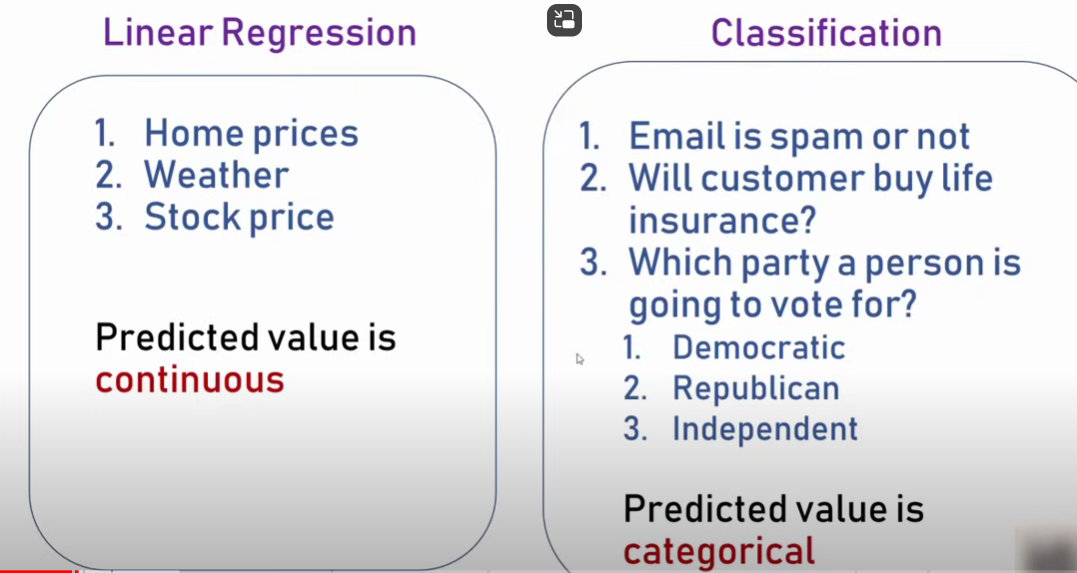

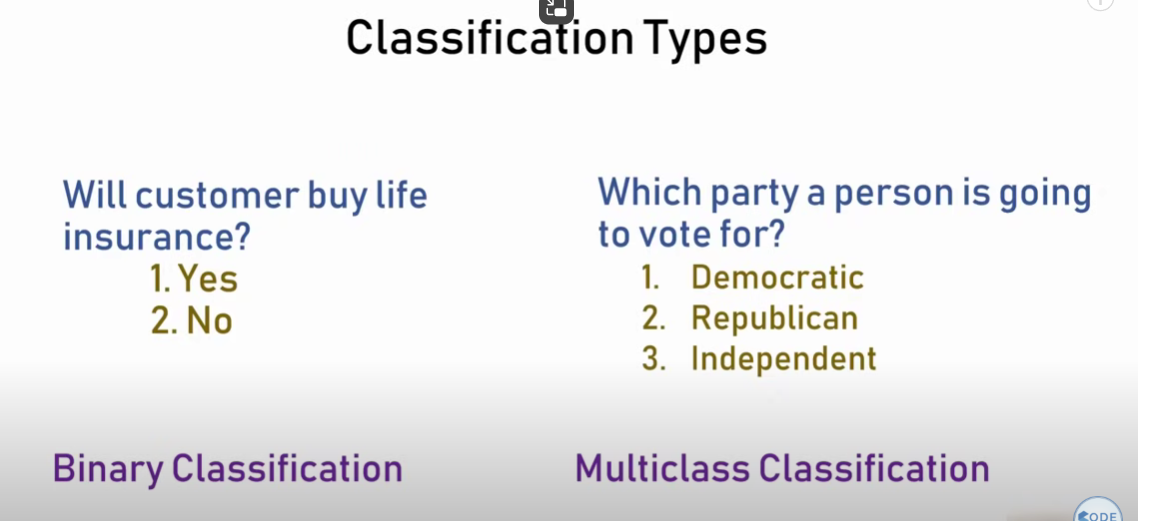

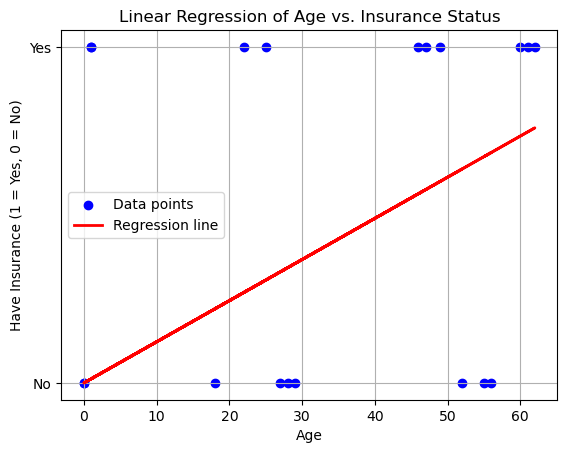

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load data from CSV file
data = pd.read_csv('insurance.csv')

# Extracting age and insurance status
age = data['age'].values.reshape(-1, 1)
have_insurance = data['have_insurance'].values

# Fitting the linear regression model
model = LinearRegression(fit_intercept=False)
model.fit(age, have_insurance)

# Making predictions
age_range = np.sort(age.reshape(-1, 1))  # Sort and reshape the ages from the dataset
predictions = model.predict(age_range)

# Plotting
plt.scatter(age, have_insurance, color='blue', label='Data points')
plt.plot(age_range, predictions, color='red', linewidth=2, label='Regression line')
plt.title('Linear Regression of Age vs. Insurance Status')
plt.xlabel('Age')
plt.ylabel('Have Insurance (1 = Yes, 0 = No)')
plt.yticks([0, 1], ['No', 'Yes'])
plt.legend()
plt.grid()
plt.show()

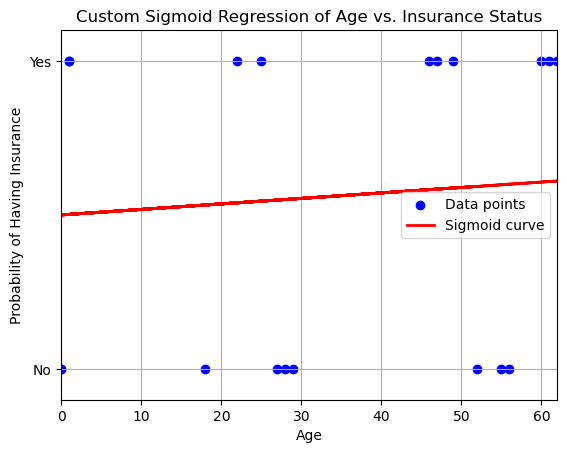

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Load data from CSV file
data = pd.read_csv('insurance.csv')

# Extracting age and insurance status
age = data['age'].values.reshape(-1, 1)
have_insurance = data['have_insurance'].values

# Fitting the linear regression model without an intercept
model = LogisticRegression(fit_intercept=False)
model.fit(age.reshape(-1, 1), have_insurance)

# Using all the age values from the dataset for predictions
age_range = np.sort(age.reshape(-1, 1))  # Sort and reshape ages from dataset
log_odds = model.predict_proba(age_range)[:, 1]  # Get the probability of having insurance

# Plotting
plt.scatter(age, have_insurance, color='blue', label='Data points')
plt.plot(age_range, log_odds, color='red', linewidth=2, label='Sigmoid curve')
plt.title('Logistic Regression of Age vs. Insurance Status')
plt.xlabel('Age')
plt.ylabel('Probability of Having Insurance')
plt.yticks([0, 1], ['No', 'Yes'])
plt.legend()
plt.grid()
plt.show()

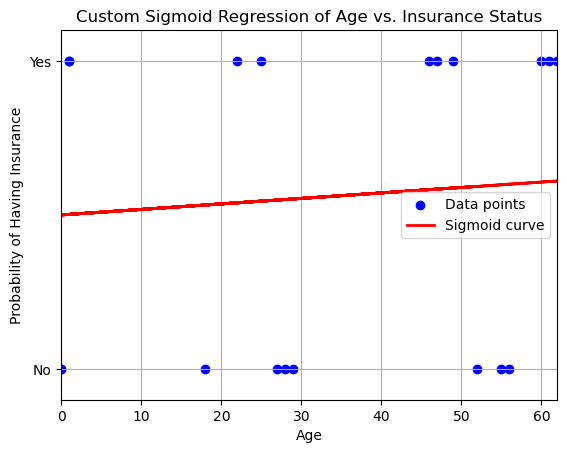

In [15]:
model = LogisticRegression(fit_intercept=False)
model.fit(age.reshape(-1, 1), have_insurance)

# Get the coefficients from the fitted model
coefficients = model.coef_[0]  # b_1
b_1 = coefficients[0]

# Define the logistic function


def sigmoid(x):
    return 1 / (1 + np.exp(-b_1 * x))


# Using all the age values from the dataset for predictions
age_range = np.sort(age.reshape(-1, 1))  # Sort and reshape ages from dataset
log_odds = sigmoid(age_range)  # Apply the sigmoid function

# Plotting
plt.scatter(age, have_insurance, color='blue', label='Data points')
plt.plot(age_range, log_odds, color='red', linewidth=2, label='Sigmoid curve')
plt.title('Custom Sigmoid Regression of Age vs. Insurance Status')
plt.xlabel('Age')
plt.ylabel('Probability of Having Insurance')
plt.yticks([0, 1], ['No', 'Yes'])
plt.legend()
plt.grid()
plt.xlim(0, np.max(age))  # Ensure x-axis starts from 0
plt.ylim(-0.1, 1.1)  # Extend y-axis slightly beyond [0, 1]
plt.show()